In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import tensorflow_hub as hub
import cv2 as cv
import socket

In [14]:
#import dataset, dataframe or image
df = pd.read_csv("diabetes.csv")

In [15]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


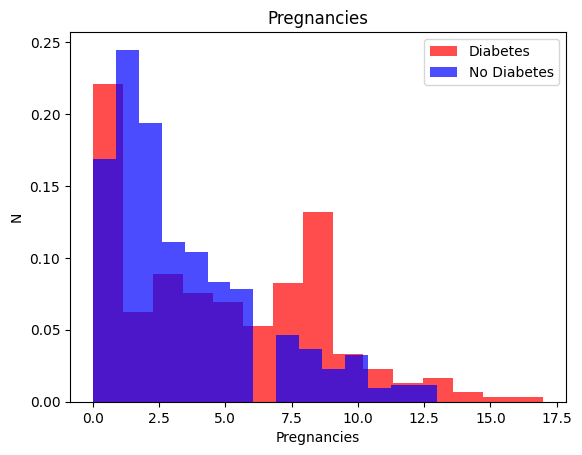

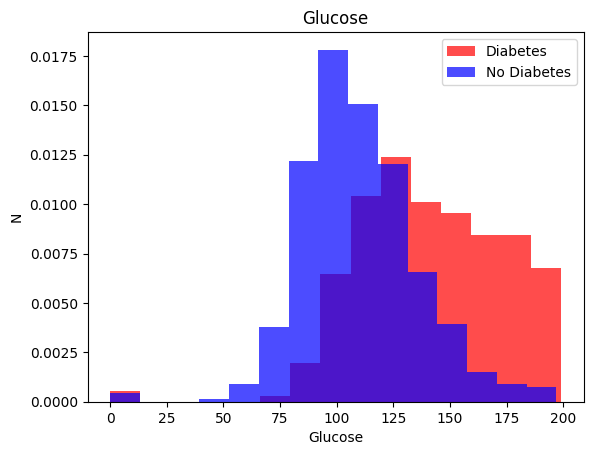

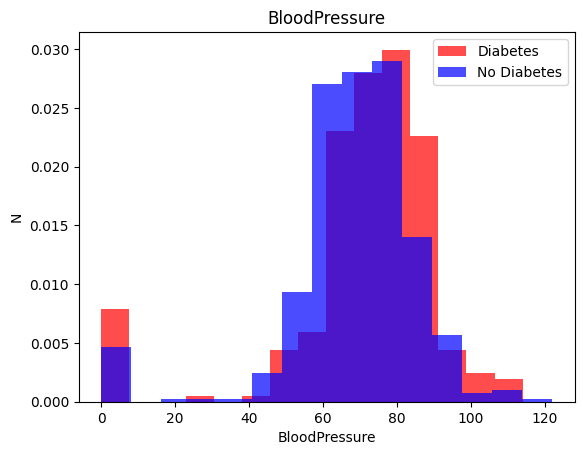

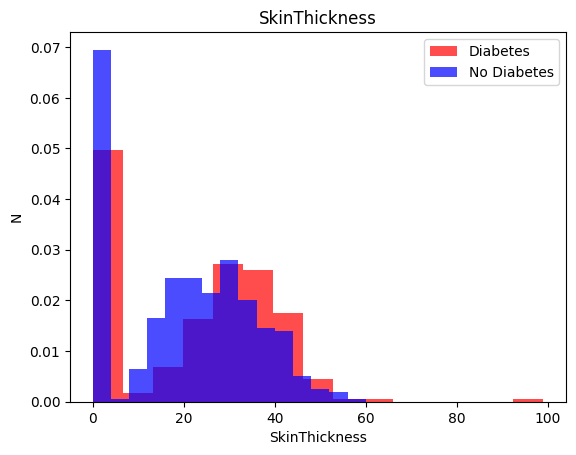

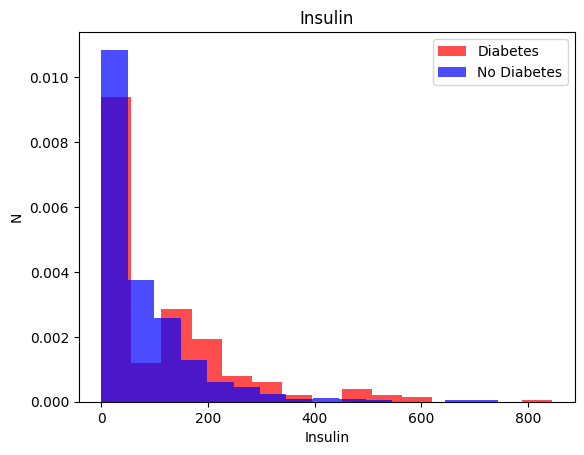

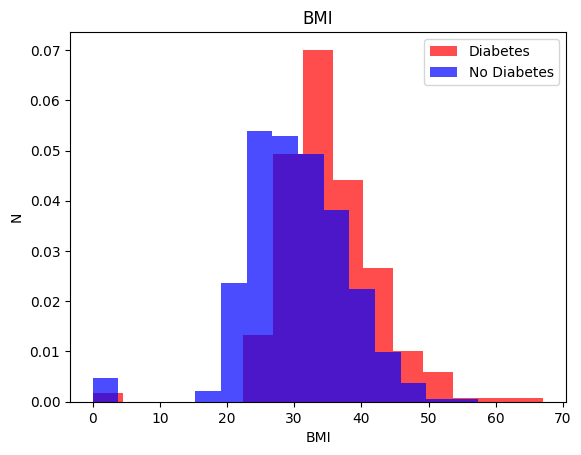

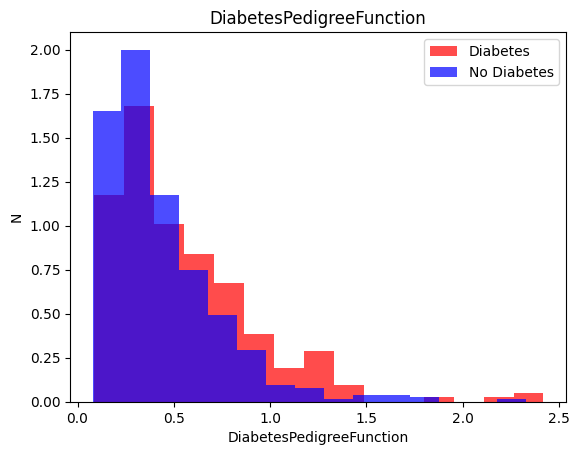

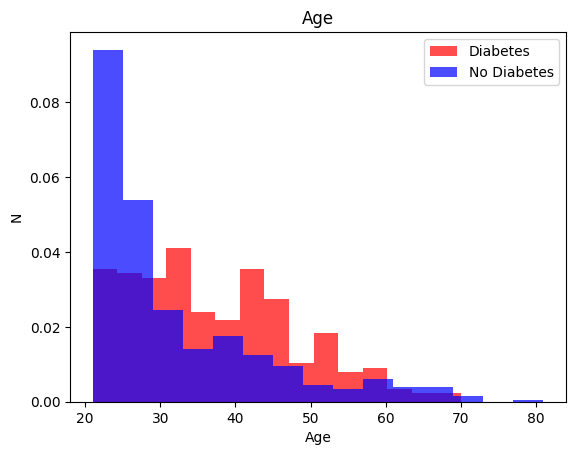

In [16]:
for i in range (len(df.columns[:-1])):
    label = df.columns[i]
    
    #density = True serve para normalizar as informaões quando um dataset possui viés, aqui por exemplo o datset 
    #contém um maior número de ocorrencias sem diabetes

    plt.hist(df[df['Outcome']==1][label], color = 'red', label = "Diabetes", alpha = 0.7,density = True, bins = 15)
    plt.hist(df[df['Outcome']==0][label], color = 'blue', label = "No Diabetes", alpha = 0.7,density = True, bins = 15)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("N")
    plt.legend()
    plt.show()

In [17]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [24]:
x.shape, y.shape

((768, 8), (768,))

In [ ]:
#normalizar a data como préprocessamento para evitar ruidos/viéses
scaler =  StandardScaler() #mapeia os dados em uma distribuição normal e mede o quanto desvia
x = scaler.fit_transform(x)
data = np.hstack ((x, np.reshape(y, (-1,1))))
transformed_df = pd.DataFrame(data, column=df.columns)

In [18]:
x_train, x_temp, y_train, y_temp = train_test_split(x,y, test_size=0.4, random_state=0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp,y_temp, test_size=0.5, random_state=0)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation = "relu"), #if x<0 --> 0, x>0 --> x
    tf.keras.layers.Dense(16,activation = "relu"), #if x<0 --> 0, x>0 --> x
    tf.keras.layers.Dense(1,activation = "sigmoid") #if x<0 --> 0, x>0 --> x
])

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss= tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

In [21]:
model.evaluate(x_train, y_train)

15/15 [==============================] - 1s 1ms/step - loss: 15.1003 - accuracy: 0.3587


[15.100297927856445, 0.3586956560611725]

In [22]:
model.evaluate(x_valid,y_valid)

5/5 [==============================] - 0s 2ms/step - loss: 13.4670 - accuracy: 0.3506


[13.46699047088623, 0.350649356842041]

In [23]:
model.fit(x_train,y_train, batch_size = 16, epochs=20,validation_data=(x_valid, y_valid))

Epoch 1/20
29/29 [==============================] - 1s 4ms/step - loss: 8.4170 - accuracy: 0.3609 - val_loss: 1.5466 - val_accuracy: 0.4026
Epoch 2/20
29/29 [==============================] - 0s 3ms/step - loss: 1.3896 - accuracy: 0.6174 - val_loss: 0.7736 - val_accuracy: 0.6104
Epoch 3/20
29/29 [==============================] - 0s 3ms/step - loss: 0.8921 - accuracy: 0.6391 - val_loss: 0.7252 - val_accuracy: 0.6364
Epoch 4/20
29/29 [==============================] - 0s 3ms/step - loss: 0.7413 - accuracy: 0.6522 - val_loss: 0.7099 - val_accuracy: 0.6494
Epoch 5/20
29/29 [==============================] - 0s 3ms/step - loss: 0.7245 - accuracy: 0.6457 - val_loss: 0.6983 - val_accuracy: 0.6299
Epoch 6/20
29/29 [==============================] - 0s 3ms/step - loss: 0.6804 - accuracy: 0.6674 - val_loss: 0.6819 - val_accuracy: 0.6234
Epoch 7/20
29/29 [==============================] - 0s 3ms/step - loss: 0.6711 - accuracy: 0.6804 - val_loss: 0.6826 - val_accuracy: 0.6688
Epoch 8/20
29/29 [==